**Задание 1.**

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

In [7]:
!pip install opendatasets

In [8]:
pip install wget

In [9]:
!pip install scikit-learn

In [10]:
import pandas as pd
import numpy as np
import opendatasets as od
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import nltk
from sklearn import linear_model

# Датасет взят "Успеваемость студентов на экзаменах".

# В датасете содержится информация об оценках, полученных учащимися по различным предметам.

In [12]:
# Загрузка датасета, если он еще не скачан
dataset_path = Path('StudentsPerformance', 'data.csv')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/spscientist/students-performance-in-exams')

Skipping, found downloaded files in "./students-performance-in-exams" (use force=True to force download)


In [14]:
# Чтение файла с данными
df = pd.read_csv('StudentsPerformance.csv', engine='python')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **Задание 2.**

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Разметкой данного набора данных считается указание для каждого пациента (пациенту соответствует строка датасета) статуса здоровья относительно атеросклероза: норма (normal), предрасположенность (at risk), атеросклероз (atherosclerosis).


Создаем новый столбец в таблице df под названием Math_PassStatus и записываем в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

In [19]:
#Для решения задачи разметки нужно убедиться что все поля заполнены

df[['math score', 'writing score', 'reading score']].info()

### Вывод: все необходимые поля набора данных полностью заполнены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     1000 non-null   int64
 1   writing score  1000 non-null   int64
 2   reading score  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [20]:
import re

def rule_based_label(row, math_score,	reading_score,	writing_score):
    if any(row, math_score,	reading_score,	writing_score) < 50:
        return 'F'
    else:
        return 'P'

In [21]:
df['Math_PassStatus'] = df['math score'].apply(lambda x: 'F' if x < 50 else 'P')
df['Writing_PassStatus'] = df['writing score'].apply(lambda x: 'F' if x < 50 else 'P')
df['Reading_PassStatus'] = df['reading score'].apply(lambda x: 'F' if x < 50 else 'P')
passmark = 50
print(
    f"""\tМатематика\n{df['Math_PassStatus'].value_counts()}\n
\tПисьмо\n{df['Writing_PassStatus'].value_counts()}\n
\tЧтение\n{df['Reading_PassStatus'].value_counts()}""")

	Математика
Math_PassStatus
P    865
F    135
Name: count, dtype: int64

	Письмо
Writing_PassStatus
P    886
F    114
Name: count, dtype: int64

	Чтение
Reading_PassStatus
P    910
F     90
Name: count, dtype: int64


In [23]:
#Создаем столбец OverAll_PassStatus и записываем в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

from numpy import where

df['OverAll_PassStatus'] = where((df['Math_PassStatus'] == 'P') & (
    df['Writing_PassStatus'] == 'P') & (df['Reading_PassStatus'] == 'P'), 'P', 'F')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Writing_PassStatus,Reading_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,P,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [24]:
# Другой способ, через apply и функцию

def positive_grades(row):
    if 'F' in (row.Math_PassStatus, row.Writing_PassStatus, row.Reading_PassStatus):
        return 'F'
    else:
        return 'P'

df['OverAll_PassStatus'] = df.apply(positive_grades, axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Writing_PassStatus,Reading_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,P,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


# **Задача 3.**

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

# **Задача 4.**

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [25]:
# Запускаем label-studio
!pip install label-studio

In [26]:
!label-studio

=> Database and media directory: /root/.local/share/label-studio
=> Static URL is set to: /static/
=> Database and media directory: /root/.local/share/label-studio
=> Static URL is set to: /static/
Read environment variables from: /root/.local/share/label-studio/.env
get 'SECRET_KEY' casted as '<class 'str'>' with default ''
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /pypi/label-studio/json HTTP/1.1" 200 33344
NumExpr defaulting to 2 threads.

*** WARNING! ***
* Port 8080 is in use.
* Trying to start at 8081
****************

December 05, 2024 - 20:53:12
Django version 4.2.17, using settings 'label_studio.core.settings.label_studio'
Starting development server at http://0.0.0.0:8081/
Quit the server with CONTROL-C.



In [27]:
### Выделим из общего набора данных необходимые данные для ручной разметки в отдельный файл

df1 = df[['math score',	'reading score','writing score','Math_PassStatus',	'Writing_PassStatus',	'Reading_PassStatus',	'OverAll_PassStatus']]

df1.to_csv('new.csv', index = False)


In [28]:
df1.head()

,math score,reading score,writing score,Math_PassStatus,Writing_PassStatus,Reading_PassStatus,OverAll_PassStatus
0,72,72,74,P,P,P,P
1,69,90,88,P,P,P,P
2,90,95,93,P,P,P,P
3,47,57,44,F,F,P,F
4,76,78,75,P,P,P,P


In [29]:
# Объединение датафреймов
# Объеденим три датафрейма
df_score_news_concat = pd.concat([df, df1], axis=0)
df_score_news_concat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Writing_PassStatus,Reading_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,P,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [30]:
df_score_news_concat.isna().sum() #isna - ищет пустые значения(NaN'ы), а sum() выводить их сумму

,0
gender,1000
race/ethnicity,1000
parental level of education,1000
lunch,1000
test preparation course,1000
math score,0
reading score,0
writing score,0
Math_PassStatus,0
Writing_PassStatus,0


<Axes: >

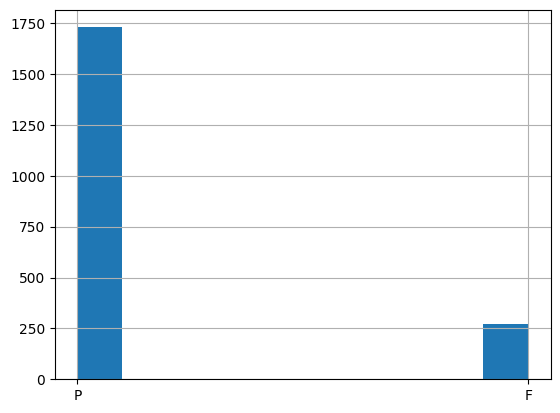

In [31]:
# Выведем график тональности заголовков новостей
df_score_news_concat['Math_PassStatus'].hist()

# **Задача 5.**

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [33]:
pip install tensorflow-cpu==2.15.0.post1

In [53]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 [==============================] - 1s 0us/step


In [55]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [56]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 3s 4ms/step - loss: 0.3486 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.1803 - val_sparse_categorical_accuracy: 0.9503
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1636 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.1382 - val_sparse_categorical_accuracy: 0.9596


In [57]:
print(history.history)

{'loss': [0.3486100137233734, 0.16359037160873413], 'sparse_categorical_accuracy': [0.9012200236320496, 0.9520800113677979], 'val_loss': [0.18027381598949432, 0.13824649155139923], 'val_sparse_categorical_accuracy': [0.9502999782562256, 0.9595999717712402]}


In [60]:
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# **Задача 6.**

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

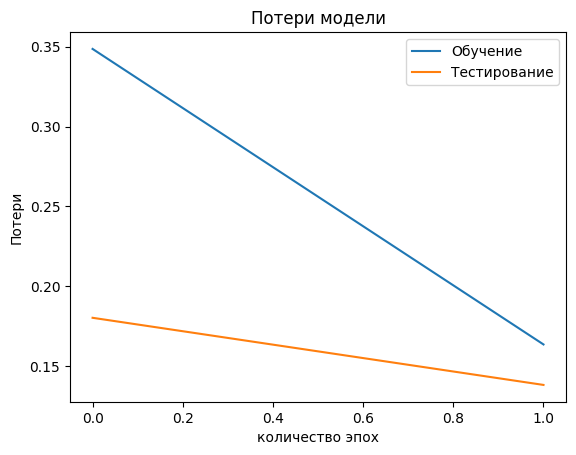

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper right')
plt.show()

In [68]:
# Расчет некоторых других метрик качества модели
loss, accuracy = model.evaluate(x_test, y_test)
y_test_predicted = np.argmax(model.predict(x_test), axis=1)
f1 = f1_score(y_test, y_test_predicted, average='weighted')
print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

313/313 [==============================] - 1s 2ms/step
Test Loss (Потери): 0.12912753224372864,
Test Accuracy (Точность): 0.9599999785423279
F-score = 0.9599749005276089


# Вывод: эффективность модели в решении задачи разметки при точности 95.5% можно считать хорошей.